## Exploratory Data Analytics (EDA) project using Real World data Epizitone Ngulle.


## Tasks

1. What is the best month for sales? How much it was the earnings?

2. Which city had the highest number of sales

3. What time should we display advertisment to maximize the liklihood of customer for buying products?

4. what products are most often sold together?

5. Segregate/Classify all the products with expensive product,mid range product and  cheapest ones?

6. How much percentage more expensive is **Macbook Pro Laptop** when compared to all products?

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from itertools import combinations
from collections import Counter
import plotly
import plotly.express as px
import datetime
sns.set_style('darkgrid')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  # To omit default='warnings'

In [262]:
sales_df =pd.read_csv(r"C:\Users\epizi/BDS_Project/Data/allsalesdata.xls")

In [263]:
sales_df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [264]:
#dropping the first column from the datafame
sales_df.drop('Unnamed: 0', axis=1, inplace=True)


In [265]:
#checking the datatypes
sales_df.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [266]:
#Checking the data if the column was dropped
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [267]:
#checking the numberof columns and rows in the dataset
print('The no of data points are:',sales_df.shape[0])
print('='*40)
print('The no of features are:',sales_df.shape[1])
print('='*40)

The no of data points are: 186850
The no of features are: 6


In [268]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [269]:
#Checking the number of null values in each column
sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [270]:
sales_df.dropna(inplace=True)

## Task 1: What is the best month for sales? How much it was the earnings?


In [271]:
#(sales_df['Order Date'] =  pd.to_datetime(sales_df['Order Date'])
print('Approach 1: Converting the Order Date column to datetime, by executing the ff code generates:')
print('Parse error: Unknown string format so that we have to fix it on the next cell.')

Approach 1: Converting the Order Date column to datetime, by executing the ff code generates:
Parse error: Unknown string format so that we have to fix it on the next cell.


In [272]:
sales_df[sales_df['Order Date'].str[0:3]=='Ord']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [273]:
# We generate a new dataframe after removing the above rows
sales_new_df = sales_df[sales_df['Order Date'].str[0:3]!='Ord']
sales_new_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [274]:
#Converting the Order date column in to datetime
sales_new_df['Order Date']= pd.to_datetime(sales_new_df['Order Date'])
sales_new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [275]:
#Adding new columns : month and sale(Quantity Ordered *Price Each)
# And we need to chang the data type for Quantity Ordered and Price Each columns to numeric values.
sales_new_df['Quantity Ordered']= pd.to_numeric(sales_new_df['Quantity Ordered'])
sales_new_df['Price Each']= pd.to_numeric(sales_new_df['Price Each'])
sales_new_df['Month']=sales_new_df['Order Date'].dt.month
sales_new_df['Sales'] = sales_new_df['Quantity Ordered'] * sales_new_df['Price Each']
sales_new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [276]:
sales_per_month = sales_new_df.groupby('Month')['Sales'].sum().reset_index()
sales_per_month.columns = ['Month','Sales']
sales_per_month

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


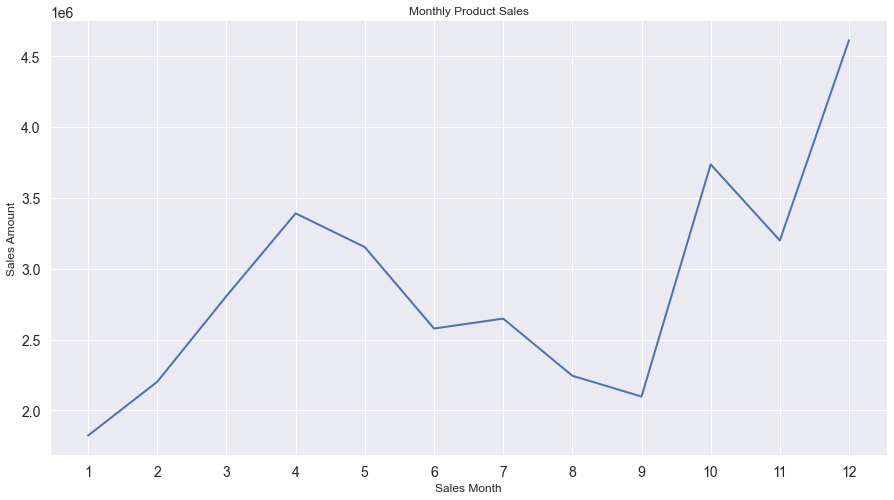

In [277]:
#Visualization using seaborn
%matplotlib inline
plt.figure(figsize=(15,8))
sns.lineplot(sales_per_month['Month'],sales_per_month['Sales'],data=sales_per_month,linewidth=2)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Monthly Product Sales')
plt.xlabel('Sales Month')
plt.xticks(sales_per_month['Month'])
plt.ylabel('Sales Amount')
plt.show()
#Answer 1: October and Decemeber are the best monthes for selling products.

##### Answer 1: October and Decemeber are the best monthes for selling products.

##  Task 2: Which city had the highest number of sales?

In [278]:
sales_new_df['City']=[cities.split(',')[1] for cities in sales_new_df['Purchase Address'].values]
sales_new_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [279]:
sales_per_city = sales_new_df.groupby('City')['Sales'].sum().reset_index()
sales_per_city.columns=['City', 'Sales']
sales_per_city

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


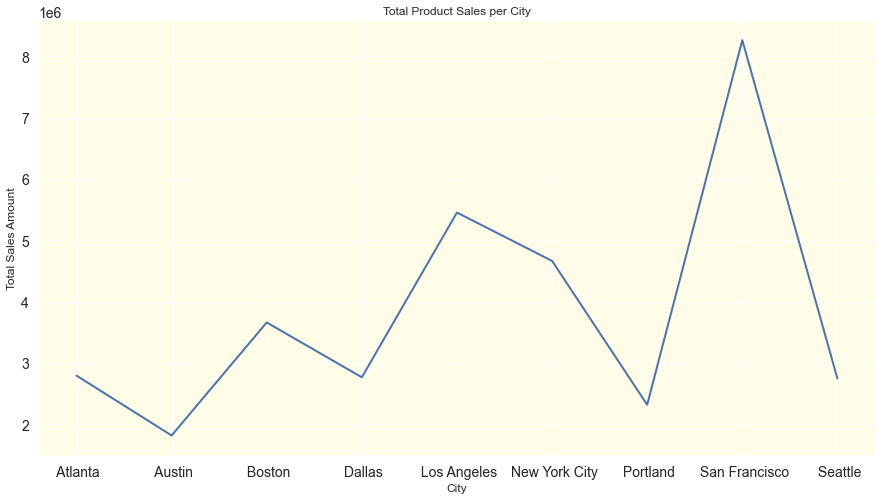

In [280]:
#Visualization using seaborn
%matplotlib inline
plt.figure(figsize=(15,8))
sns.lineplot(sales_per_city['City'],sales_per_city['Sales'],data=sales_per_month,linewidth=2)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Total Product Sales per City')
plt.xlabel('City')
plt.xticks(sales_per_city['City'])
plt.ylabel('Total Sales Amount')
plt.show()

##### Answer 2: San Francisco and Los Angeles had the highes sales respectively

## Task 3. What time should we display advertisment to maximize the liklihood of customer for buying products?

In [281]:
#Extracting hour from Order date column
sales_new_df['hour']=sales_new_df['Order Date'].dt.hour

In [282]:
time_of_orders=sales_new_df.groupby('hour')['Order ID'].count().reset_index()
time_of_orders.columns=['Hour','Total_Orders']
time_of_orders.sort_values('Total_Orders',ascending=False)

,Hour,Total_Orders
19,19,12905
12,12,12587
11,11,12411
18,18,12280
20,20,12228
13,13,12129
14,14,10984
10,10,10944
21,21,10921
17,17,10899


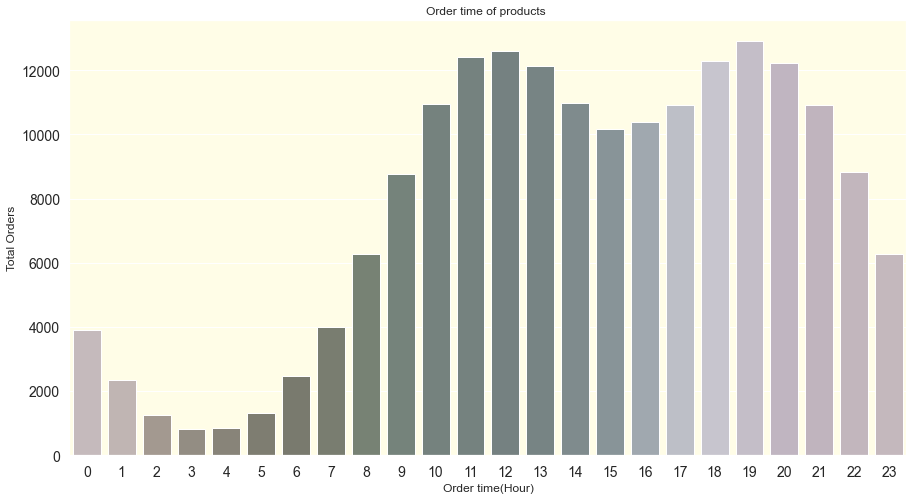

In [283]:
#Visualilzation
plt.figure(figsize=(15,8))
sns.barplot(x=time_of_orders['Hour'],y=time_of_orders['Total_Orders'],data=time_of_orders,saturation = 0.1)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Order time of products ')
plt.xlabel('Order time(Hour)')
plt.xticks(time_of_orders['Hour'])
plt.ylabel('Total Orders')
plt.show()

##### Answer 3: The time to display advertisement will be at 7pm and at 12pm midday

## Task 4: What products are most often sold together?

In [284]:
# We need to find out products with the same Order Id:
product_sold=sales_new_df
product_sold.rename(columns={'Order ID':'Order_ID'},inplace=True)

In [285]:
# To group products with same order ID
#sales_new_df['Group_Product']=sales_new_df.groupby('Order_ID')['Product'].transform(lambda x:",".join(x))
#sales_new_df.head()

# To group products with same order ID
product_sold['Group_Product']=product_sold.groupby('Order_ID')['Product'].transform(lambda x:",".join(x))
product_sold.head()

,Order_ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones


In [286]:
#To show products with the same order id
#sales_new_df = sales_new_df[sales_new_df['Order_ID'].duplicated(keep=False)]
#sales_new_df.head(10)
#To show products with the same order id
product_sold[product_sold['Order_ID'].duplicated(keep=False)]
product_sold.head(10)

,Order_ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,USB-C Charging Cable
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7,Bose SoundSport Headphones
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10,USB-C Charging Cable
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,10,Macbook Pro Laptop
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston,14,Wired Headphones


In [287]:
#Let us drop the duplicate values from Order_ID and Group product columns
#sales_new_df.drop_duplicates(subset=['Order_ID','Group_Product'],inplace=True)
#consider Order_ID and Group columns for dropping duplicates
product_sold.drop_duplicates(subset=['Order_ID','Group_Product'],inplace=True)

In [288]:
#product_sold = sales_new_df
#sales_new_df.rename(columns={'Price Each':'Price_Each'},inplace=True)


In [289]:
#product_sold.rename(columns={'Price Each':'Price_Each'},inplace=True)

In [290]:
# To check products which are sold altogether  
count=Counter()
for rows in product_sold['Group_Product']:
    row_list=rows.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count.most_common(5))
#Answer: iPhone and Lightning Charging Cable are products sold together in frequent manner

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]


## Task 5: Segregate/Classify all the products with expensive product,mid range product and cheapest ones?

In [291]:
product_sold.rename(columns={'Price Each':'Price_Each'},inplace=True)

In [292]:
product_sold.head()

,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,City,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,USB-C Charging Cable


In [312]:
#!pip install -U pandasql

In [322]:
#Segregation result 1 means : highly expensive product, 2 means :medium level and 3 means cheaper one
mysql = lambda q: sqldf(q, globals())
ntile_segregation=   """
               select *,ntile(3) over(order by Price_Each desc) as segregation
               from product_sold
               """ 
new_df= mysql(ntile_segregation)
expensive_product=new_df[new_df['segregation']==1]
expensive_product.head()

,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,City,hour,Group_Product,segregation
0,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00.000000,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,Macbook Pro Laptop,1
1,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00.000000,"853 Cedar St, San Francisco, CA 94016",4,1700.0,San Francisco,16,Macbook Pro Laptop,1
2,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00.000000,"373 Adams St, Boston, MA 02215",4,1700.0,Boston,21,Macbook Pro Laptop,1
3,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00.000000,"657 Adams St, Portland, OR 97035",4,1700.0,Portland,7,Macbook Pro Laptop,1
4,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00.000000,"121 Wilson St, Los Angeles, CA 90001",4,1700.0,Los Angeles,10,Macbook Pro Laptop,1


In [315]:
#new_df.dtypes

In [311]:

expensive_sql="""
      select distinct(Product) as Expensive_product,Price_Each from expensive_product
"""
mysql(expensive_sql)

,Expensive_product,Price_Each
0,Macbook Pro Laptop,1700.00
1,ThinkPad Laptop,999.99
2,iPhone,700.00
3,Google Phone,600.00
4,LG Dryer,600.00
5,LG Washing Machine,600.00
6,Vareebadd Phone,400.00
7,27in 4K Gaming Monitor,389.99
8,34in Ultrawide Monitor,379.99
9,Flatscreen TV,300.00


##### Ans:  Macbook Pro Laptop is the most expensive product

In [314]:
expensive_product=new_df[new_df['segregation']==3]
expensive_sql="""
      select distinct(Product) as Expensive_product,Price_Each from expensive_product
"""
mysql(expensive_sql)

,Expensive_product,Price_Each
0,USB-C Charging Cable,11.95
1,AA Batteries (4-pack),3.84
2,AAA Batteries (4-pack),2.99


##### Ans: AAA Bateries(4-pack) is the cheapest product

## Task 6: How much percentage more expensive is Macbook Pro Laptop when compared to all products?

In [321]:
# I'm Using the window function  PERCENT_RANK .
# Formula = Current Row No - 1 / Total no of rows - 1 
product_ranking="""
    select *,
    percent_rank() over(order by Price_Each ) as percent_rank ,
    round(percent_rank() over(order by Price_Each ) * 100, 2) as percentage
    from sales_new_df
"""
product_ranking_mac= mysql(product_ranking)

product_ranking_mac[product_ranking_mac['Product']=='Macbook Pro Laptop']

,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,City,hour,Group_Product,percent_rank,percentage
173813,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00.000000,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,Macbook Pro Laptop,0.974092,97.41
173814,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00.000000,"853 Cedar St, San Francisco, CA 94016",4,1700.0,San Francisco,16,Macbook Pro Laptop,0.974092,97.41
173815,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00.000000,"373 Adams St, Boston, MA 02215",4,1700.0,Boston,21,Macbook Pro Laptop,0.974092,97.41
173816,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00.000000,"657 Adams St, Portland, OR 97035",4,1700.0,Portland,7,Macbook Pro Laptop,0.974092,97.41
173817,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00.000000,"121 Wilson St, Los Angeles, CA 90001",4,1700.0,Los Angeles,10,Macbook Pro Laptop,0.974092,97.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,259041,Macbook Pro Laptop,1,1700.0,2019-09-13 23:14:00.000000,"220 Sunset St, New York City, NY 10001",9,1700.0,New York City,23,Macbook Pro Laptop,0.974092,97.41
178433,259157,Macbook Pro Laptop,1,1700.0,2019-09-12 05:01:00.000000,"326 Forest St, Seattle, WA 98101",9,1700.0,Seattle,5,Macbook Pro Laptop,0.974092,97.41
178434,259299,Macbook Pro Laptop,1,1700.0,2019-09-30 23:59:00.000000,"240 Chestnut St, Los Angeles, CA 90001",9,1700.0,Los Angeles,23,Macbook Pro Laptop,0.974092,97.41
178435,259308,Macbook Pro Laptop,1,1700.0,2019-09-26 19:16:00.000000,"912 8th St, Boston, MA 02215",9,1700.0,Boston,19,Macbook Pro Laptop,0.974092,97.41


##### Ans: Macbook Pro Laptop is 97.41% more expensive when we compared it to all other products.